This is a test of EfficientNet. How the model of classification works ??? </br>
**Image classification** </br>
    is the task of categorizing an image into one of several predefined classes, often also giving a probability of the input belonging to a certain class. This task is crucial in understanding and analyzing images, and it comes quite effortlessly to human beings with our complex visual systems. Most powerful image classification models today are built using some form of Convolution Neural Networks (CNNs), which are also the backbone of many other tasks in Computer Vision.

In [5]:
import torch
from PIL import Image
import torchvision.transforms as transforms
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Using {device} for inference')


Using cuda for inference


Load the model from HUB to explore the models: https://pytorch.org/hub/nvidia_deeplearningexamples_efficientnet/

-    'NVIDIA/DeepLearningExamples:torchhub' This is the link to State-of-the-Art Deep Learning examples that are easy to train and deploy, achieving the best reproducible accuracy and performance with NVIDIA CUDA-X software stack running on NVIDIA Volta, Turing and Ampere GPUs.

In [17]:
efficientnet = torch.hub.load(repo_or_dir='NVIDIA/DeepLearningExamples:torchhub', model='nvidia_efficientnet_b0', pretrained=True)
print(efficientnet)
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_convnets_processing_utils')
print(utils)
# inference
efficientnet.eval().to(device)


EfficientNet(
  (stem): Sequential(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (activation): SiLU(inplace=True)
  )
  (layers): Sequential(
    (0): Sequential(
      (block0): MBConvBlock(
        (depsep): Sequential(
          (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (se): SequentialSqueezeAndExcitation(
          (squeeze): Linear(in_features=32, out_features=8, bias=True)
          (expand): Linear(in_features=8, out_features=32, bias=True)
          (activation): SiLU(inplace=True)
          (sigmoid): Sigmoid()
          (mul_a_quantizer): Identity()
          (mul_b_quantizer): Identity()
        )
      

Using cache found in /home/igofed/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub
Using cache found in /home/igofed/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


EfficientNet(
  (stem): Sequential(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (activation): SiLU(inplace=True)
  )
  (layers): Sequential(
    (0): Sequential(
      (block0): MBConvBlock(
        (depsep): Sequential(
          (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (se): SequentialSqueezeAndExcitation(
          (squeeze): Linear(in_features=32, out_features=8, bias=True)
          (expand): Linear(in_features=8, out_features=32, bias=True)
          (activation): SiLU(inplace=True)
          (sigmoid): Sigmoid()
          (mul_a_quantizer): Identity()
          (mul_b_quantizer): Identity()
        )
      

In [33]:
uris = [
    '/media/igofed/SSD_2T/DATASETS/weather_2/test_/desktop_0079_1.png', # 1
    '/media/igofed/SSD_2T/DATASETS/weather_2/test_/desktop_0091_1.png', # 2
    '/media/igofed/SSD_2T/DATASETS/weather_2/test_/desktop_0095_1.png', # 3
    '/media/igofed/SSD_2T/DATASETS/weather_2/test_/desktop_0229_1.png', # 4
    '/media/igofed/SSD_2T/DATASETS/weather_2/test_/mobile_0222_1.png',  # 5
    '/media/igofed/SSD_2T/DATASETS/weather_2/test_/munich_0098_0.png',  # 1
    '/media/igofed/SSD_2T/DATASETS/weather_2/test_/mobile_0502_0.png',  # 2
    '/media/igofed/SSD_2T/DATASETS/weather_2/test_/zurich_0032_0.png',  # 3 
    '/media/igofed/SSD_2T/DATASETS/weather_2/test_/mobile_0538_0.png',  # 4 
    '/media/igofed/SSD_2T/DATASETS/weather_2/test_/desktop_0021_0.png', # 5 
]
batch = torch.cat(
    [utils.prepare_input_from_uri(uri) for uri in uris]
).to(device)

In [34]:
with torch.no_grad():
    output = torch.nn.functional.softmax(efficientnet(batch), dim=1)
    
results = utils.pick_n_best(predictions=output, n=5)
print(results)

sample 0: [('street sign', '12.8%'), ('boathouse', '10.3%'), ('digital clock', '5.0%'), ('lakeside, lakeshore', '5.0%'), ('paddle, boat paddle', '4.2%')]
sample 1: [('sandbar, sand bar', '21.9%'), ('geyser', '16.0%'), ('seashore, coast, seacoast, sea-coast', '3.9%'), ('breakwater, groin, groyne, mole, bulwark, seawall, jetty', '2.8%'), ('volcano', '2.8%')]
sample 2: [('slot, one-armed bandit', '28.2%'), ('cinema, movie theater, movie theatre, movie house, picture palace', '16.0%'), ('streetcar, tram, tramcar, trolley, trolley car', '6.3%'), ('restaurant, eating house, eating place, eatery', '4.8%'), ('tobacco shop, tobacconist shop, tobacconist', '3.8%')]
sample 3: [('volcano', '10.9%'), ('geyser', '10.1%'), ('lakeside, lakeshore', '5.8%'), ('Angora, Angora rabbit', '3.4%'), ('maze, labyrinth', '2.5%')]
[[('street sign', '12.8%'), ('boathouse', '10.3%'), ('digital clock', '5.0%'), ('lakeside, lakeshore', '5.0%'), ('paddle, boat paddle', '4.2%')], [('sandbar, sand bar', '21.9%'), ('geys

/media/igofed/SSD_2T/DATASETS/weather_2/test_/desktop_0079_1.png


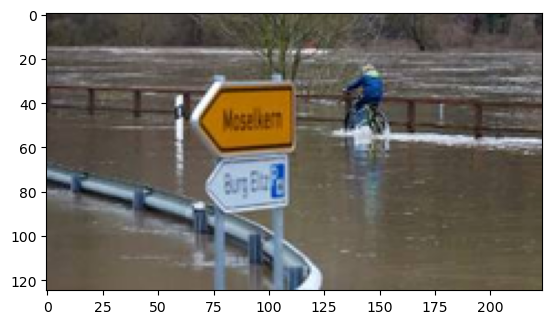

[('street sign', '12.8%'), ('boathouse', '10.3%'), ('digital clock', '5.0%'), ('lakeside, lakeshore', '5.0%'), ('paddle, boat paddle', '4.2%')]
/media/igofed/SSD_2T/DATASETS/weather_2/test_/desktop_0091_1.png


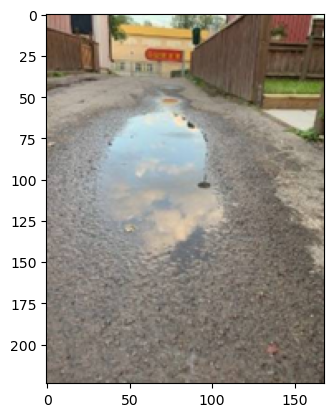

[('sandbar, sand bar', '21.9%'), ('geyser', '16.0%'), ('seashore, coast, seacoast, sea-coast', '3.9%'), ('breakwater, groin, groyne, mole, bulwark, seawall, jetty', '2.8%'), ('volcano', '2.8%')]
/media/igofed/SSD_2T/DATASETS/weather_2/test_/desktop_0095_1.png


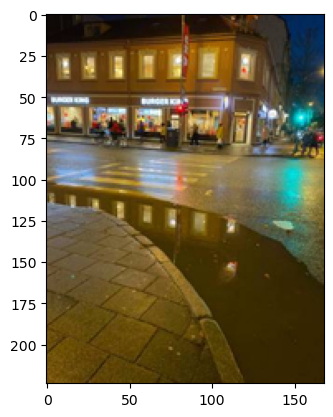

[('slot, one-armed bandit', '28.2%'), ('cinema, movie theater, movie theatre, movie house, picture palace', '16.0%'), ('streetcar, tram, tramcar, trolley, trolley car', '6.3%'), ('restaurant, eating house, eating place, eatery', '4.8%'), ('tobacco shop, tobacconist shop, tobacconist', '3.8%')]
/media/igofed/SSD_2T/DATASETS/weather_2/test_/desktop_0229_1.png


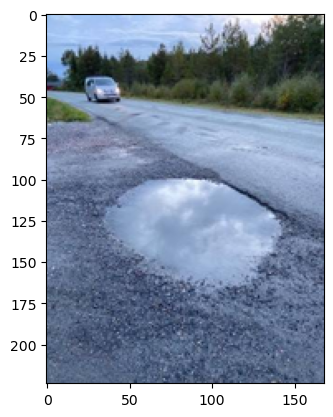

[('volcano', '10.9%'), ('geyser', '10.1%'), ('lakeside, lakeshore', '5.8%'), ('Angora, Angora rabbit', '3.4%'), ('maze, labyrinth', '2.5%')]


In [35]:
for uri, result in zip(uris, results):
    print(uri)
    img = Image.open(uri)
    img.thumbnail((224,224), Image.ANTIALIAS)
    plt.imshow(img)
    plt.show()
    print(result)
